# **Heart Disease Prediction** 
Let's Test Your skills in Classification Also  But this Time Let's Jump to Kaggle Platform !
https://www.kaggle.com/ronitf/heart-disease-uci/tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


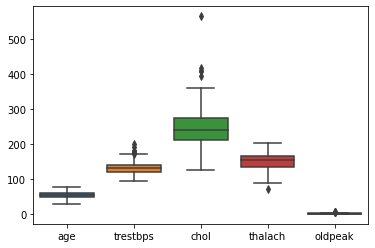

In [6]:
p = sns.boxplot(data = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]);

In [7]:
def handle_ouliers(feature):
    q1, q3 = feature.quantile([0.25, 0.75])
    IQR = q3-q1
    dwb = q1-1.5*IQR
    upb = q3+1.5*IQR
    new_feature = feature.apply(lambda x: upb if x > upb else dwb if x < dwb else x )
    return new_feature

In [8]:
for f in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    df[f] = handle_ouliers(df[f])

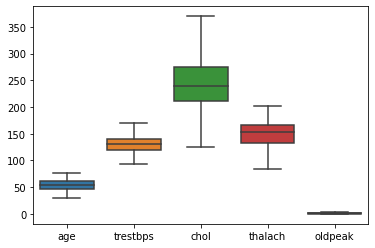

In [9]:
p = sns.boxplot(data = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]);

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.280528,245.134488,0.148515,0.528053,149.692244,0.326733,1.024422,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,16.582241,47.552910,0.356198,0.525860,22.762004,0.469794,1.110127,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.750000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


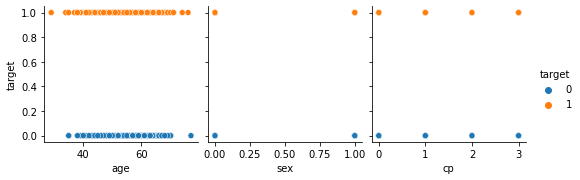

In [6]:
sns.pairplot(df, hue='target', y_vars='target', x_vars=df.columns[:3]);

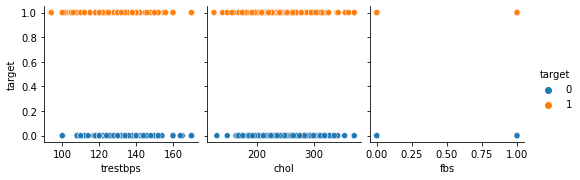

In [12]:
sns.pairplot(df, hue='target', y_vars='target', x_vars=df.columns[3:6]);

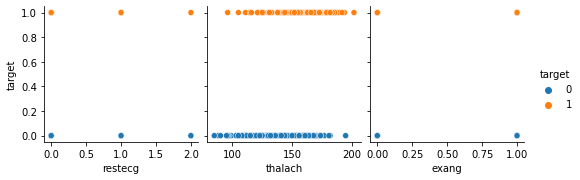

In [13]:
sns.pairplot(df, hue='target', y_vars='target', x_vars=df.columns[6:9]);

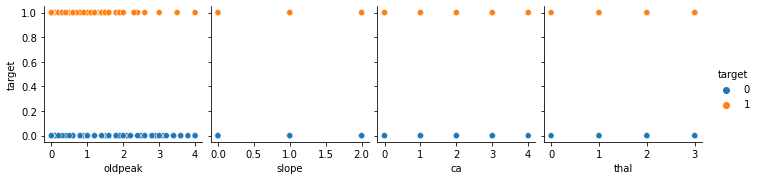

In [14]:
sns.pairplot(df, hue='target', y_vars='target', x_vars=df.columns[9:-1]);

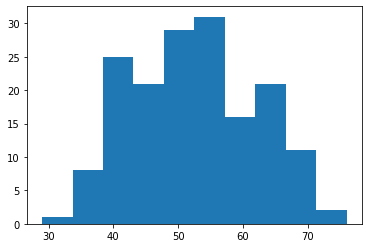

In [15]:
plt.hist(df[df.target == 1].age);

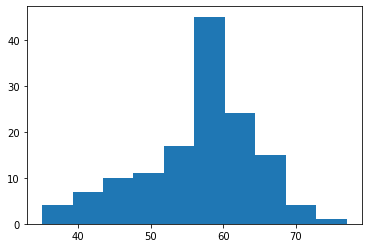

In [16]:
plt.hist(df[df.target == 0].age);

In [17]:
df.corrwith(df.target)['age']

-0.22543871587483727

Age has a negative corr with target and this is upnormal

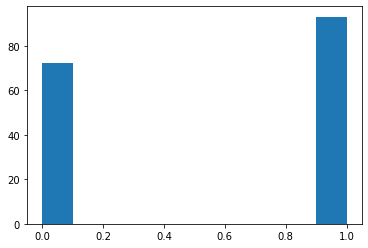

In [18]:
plt.hist(df[df.target == 1].sex);

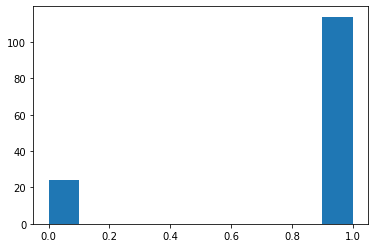

In [19]:
plt.hist(df[df.target == 0].sex);

In [20]:
df[df.sex == 1].shape[0]

207

In [21]:
n_F = df[df.sex == 0].shape[0]
n_F_1 = df[df.target == 1][df.sex == 0].shape[0]
n_F_1/n_F

C:\Users\Mahmoud\AppData\Local\Temp/ipykernel_20856/3550407991.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_F_1 = df[df.target == 1][df.sex == 0].shape[0]


0.75

In [22]:
n_M = df[df.sex == 1].shape[0]
n_M_1 = df[df.target == 1][df.sex == 1].shape[0]
n_M_1/n_M

C:\Users\Mahmoud\AppData\Local\Temp/ipykernel_20856/3780978342.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_M_1 = df[df.target == 1][df.sex == 1].shape[0]


0.4492753623188406

female: 0, male: 1

female has much more chance of heart attack

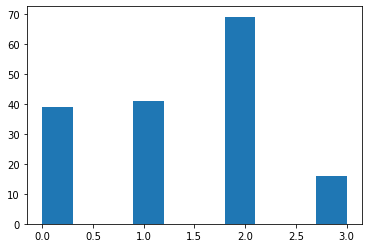

In [23]:
plt.hist(df[df.target == 1].cp);

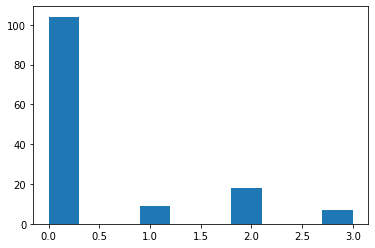

In [24]:
plt.hist(df[df.target == 0].cp);

when cp = 0 then it has less chance of heart attack

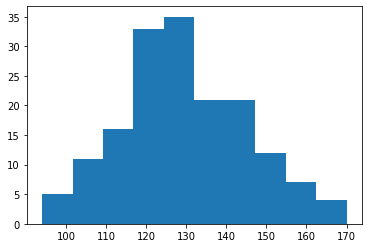

In [25]:
plt.hist(df[df.target == 1].trestbps);

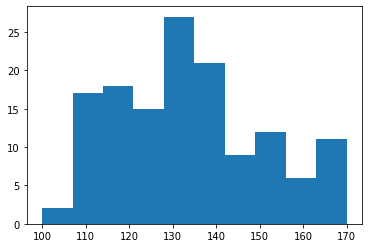

In [26]:
plt.hist(df[df.target == 0].trestbps);

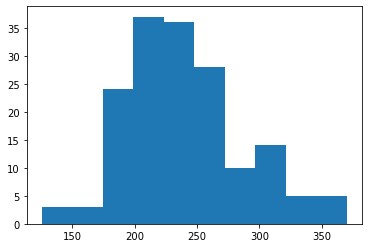

In [27]:
plt.hist(df[df.target == 1].chol);

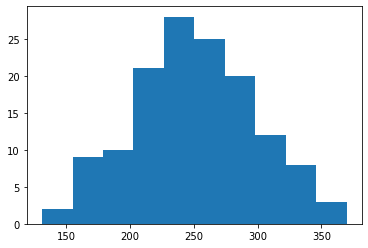

In [28]:
plt.hist(df[df.target == 0].chol);

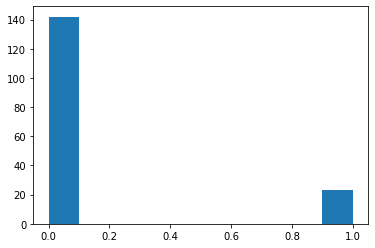

In [29]:
plt.hist(df[df.target == 1].fbs);

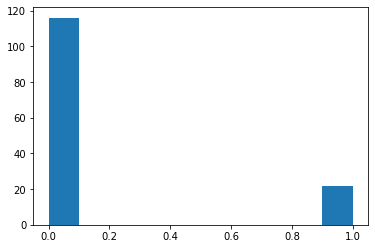

In [30]:
plt.hist(df[df.target == 0].fbs);

In [31]:
df[df.fbs == 0].shape[0]

258

In [32]:
n_fbs_0 = df[df.fbs == 0].shape[0]
n_fbs_0_t1 = df[df.fbs == 0][df.target == 1].shape[0]
n_fbs_0_t1/n_fbs_0

C:\Users\Mahmoud\AppData\Local\Temp/ipykernel_20856/3546579462.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_fbs_0_t1 = df[df.fbs == 0][df.target == 1].shape[0]


0.5503875968992248

In [33]:
n_fbs_1 = df[df.fbs == 1].shape[0]
n_fbs_1_t1 = df[df.fbs == 1][df.target == 1].shape[0]
n_fbs_1_t1/n_fbs_1

C:\Users\Mahmoud\AppData\Local\Temp/ipykernel_20856/2279784653.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_fbs_1_t1 = df[df.fbs == 1][df.target == 1].shape[0]


0.5111111111111111

Most of fbs=0 and there is no correlation between fbs and target So we will drop this column

In [34]:
df.drop(['fbs'], axis=1, inplace=True)

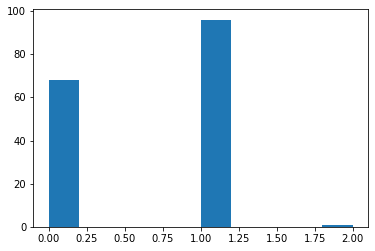

In [35]:
plt.hist(df[df.target == 1].restecg);

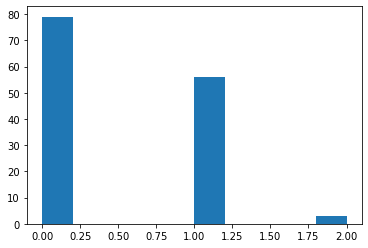

In [36]:
plt.hist(df[df.target == 0].restecg);

there is no correlation between restecg and target

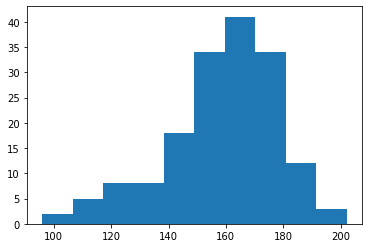

In [37]:
plt.hist(df[df.target == 1].thalach);

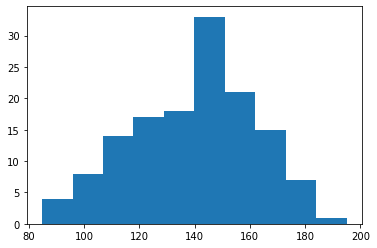

In [38]:
plt.hist(df[df.target == 0].thalach);

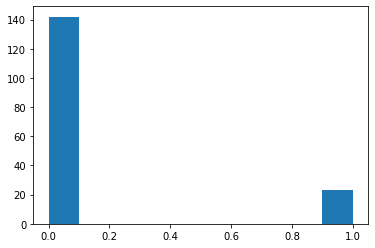

In [39]:
plt.hist(df[df.target == 1].exang);

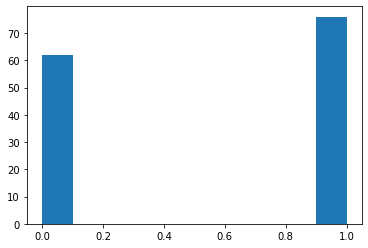

In [40]:
plt.hist(df[df.target == 0].exang);

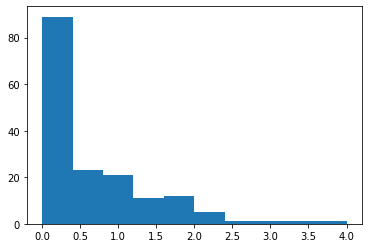

In [41]:
plt.hist(df[df.target == 1].oldpeak);

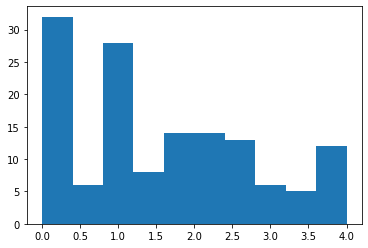

In [42]:
plt.hist(df[df.target == 0].oldpeak);

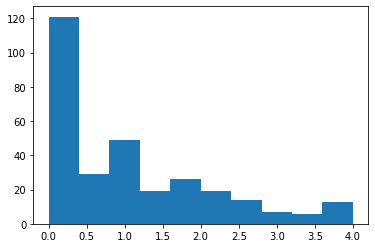

In [43]:
plt.hist(df.oldpeak);

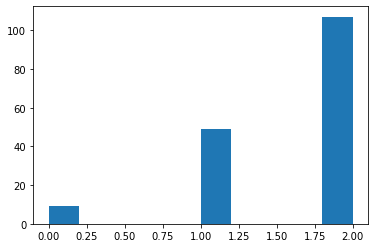

In [44]:
plt.hist(df[df.target == 1].slope);

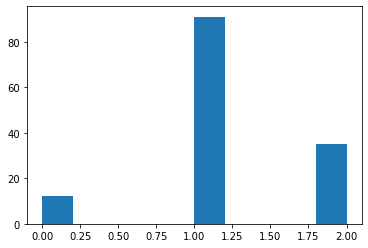

In [45]:
plt.hist(df[df.target == 0].slope);

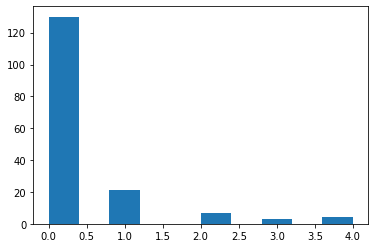

In [46]:
plt.hist(df[df.target == 1].ca);

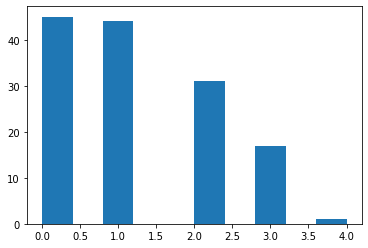

In [47]:
plt.hist(df[df.target == 0].ca);

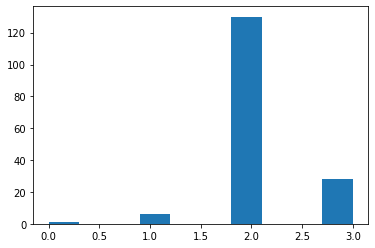

In [48]:
plt.hist(df[df.target == 1].thal);

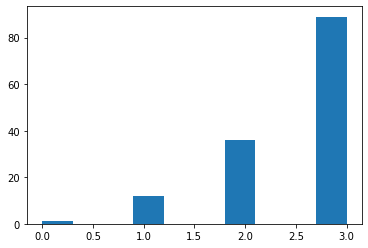

In [49]:
plt.hist(df[df.target == 0].thal);

In [50]:
df = pd.get_dummies(df,drop_first=True, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

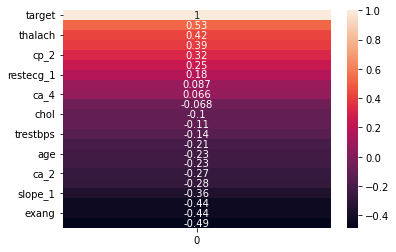

In [51]:
sns.heatmap(pd.DataFrame(df.corrwith(df.target).sort_values(ascending=False)), annot=True);

In [52]:
pd.DataFrame(df.corrwith(df.target).sort_values(ascending=False))

,0
target,1.000000
thal_2,0.527334
thalach,0.422210
slope_2,0.394066
cp_2,0.316742
cp_1,0.245879
restecg_1,0.175322
cp_3,0.086957
ca_4,0.066441
restecg_2,-0.068410


In [53]:
df['slope_2'].corr(df['slope_1'])

-0.8703650629236366

In [54]:
df['thal_2'].corr(df['thal_3'])

-0.8730321138511454

In [55]:
df['ca_4'].corr(df['ca_3'])

-0.03443488605150908

In [56]:
df['restecg_2'].corr(df['restecg_1'])

-0.11604534441596209

# feature selection

###### note that there is big correlation between (slope1 & slope2), (that_3 & that_3)

we'll drop [thal_3, slope_2, cp_1, cp_3]

In [57]:
df.drop(columns=['slope_2', 'thal_3'], inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   trestbps   303 non-null    float64
 3   chol       303 non-null    float64
 4   thalach    303 non-null    float64
 5   exang      303 non-null    int64  
 6   oldpeak    303 non-null    float64
 7   target     303 non-null    int64  
 8   cp_1       303 non-null    uint8  
 9   cp_2       303 non-null    uint8  
 10  cp_3       303 non-null    uint8  
 11  restecg_1  303 non-null    uint8  
 12  restecg_2  303 non-null    uint8  
 13  slope_1    303 non-null    uint8  
 14  ca_1       303 non-null    uint8  
 15  ca_2       303 non-null    uint8  
 16  ca_3       303 non-null    uint8  
 17  ca_4       303 non-null    uint8  
 18  thal_1     303 non-null    uint8  
 19  thal_2     303 non-null    uint8  
dtypes: float64

In [7]:
X = df.drop('target', axis=1)
y = df.target

In [8]:
def scaler(X_train, X_test, scaler = StandardScaler()):
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def myfunc(estimator, X_train, X_test, y_train, y_test):
    estimator.fit(X_train, y_train)
    y_train_estimated = estimator.predict(X_train)
    y_test_estimated = estimator.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_train_estimated)
    accuracy_test = accuracy_score(y_test, y_test_estimated)

    
    print(f'accuracy_train: {accuracy_train}')
    print(f'accuracy_test: {accuracy_test}')
    return accuracy_test

In [9]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=0,shuffle=True)
X_train_scaled, X_test_scaled = scaler(X_train, X_test, scaler=MinMaxScaler())

# SVC

In [10]:
myfunc(SVC(gamma=1), X_train_scaled, X_test_scaled, y_train, y_test);

accuracy_train: 0.9162995594713657
accuracy_test: 0.868421052631579


In [11]:
std = 0.5
myfunc(SVC(gamma=2), X_train_scaled, X_test_scaled, y_train, y_test);

accuracy_train: 0.9427312775330396
accuracy_test: 0.868421052631579


In [65]:
cross_val_score(SVC(gamma=2), X, y,cv=10)

array([0.5483871 , 0.5483871 , 0.5483871 , 0.56666667, 0.56666667,
       0.53333333, 0.53333333, 0.53333333, 0.53333333, 0.53333333])

###### cross_validation for SVC

In [14]:
acc_test_li = []
i=0
d = {}
for train_index, test_index in KFold(shuffle=True, random_state=15, n_splits=5).split(X):
    print(f'i: {i}')
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
    X_train_cv_scaled, X_test_cv_scaled = scaler(X_train_cv, X_test_cv, scaler=MinMaxScaler())
    acc_test_li.append(myfunc(SVC(gamma=2), X_train_cv_scaled, X_test_cv_scaled, y_train_cv, y_test_cv))
    d[i] = test_index
    print('------------------')
    i+=1

i: 0
accuracy_train: 0.9421487603305785
accuracy_test: 0.8032786885245902
------------------
i: 1
accuracy_train: 0.9338842975206612
accuracy_test: 0.819672131147541
------------------
i: 2
accuracy_train: 0.9421487603305785
accuracy_test: 0.8032786885245902
------------------
i: 3
accuracy_train: 0.9506172839506173
accuracy_test: 0.8166666666666667
------------------
i: 4
accuracy_train: 0.934156378600823
accuracy_test: 0.85
------------------


# Decision Tree

In [15]:
myfunc(DecisionTreeClassifier(), X_train, X_test, y_train, y_test);

accuracy_train: 1.0
accuracy_test: 0.8026315789473685


In [16]:
myfunc(DecisionTreeClassifier(), X_train, X_test, y_train, y_test);

accuracy_train: 1.0
accuracy_test: 0.8026315789473685


In [17]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.tree_.max_depth

9

In [19]:
GSCV= GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                   param_grid = {'max_depth': range(1,9), 'min_samples_leaf': range(1,20,1), 'min_samples_split': range(2,40,1)}, 
                   scoring= 'accuracy', 
                   n_jobs=-1);
GSCV.fit(X, y)
GSCV.best_params_

{'max_depth': 3}

In [20]:
cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf= 7, min_samples_split= 27), X, y, cv=5)

array([0.85245902, 0.8852459 , 0.80327869, 0.81666667, 0.75      ])

# RandomForestClassifier

In [32]:
myfunc(RandomForestClassifier(random_state=5, max_depth=4, n_estimators=100), X_train, X_test, y_train, y_test)

accuracy_train: 0.920704845814978
accuracy_test: 0.868421052631579


0.868421052631579

In [39]:
cross_val_score(RandomForestClassifier(random_state=0, max_depth=4, n_estimators=100), X, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.96666667, 0.9       ,
       0.8       , 0.83333333, 0.83333333, 0.73333333, 0.83333333])

In [22]:
GSCV= GridSearchCV(estimator=RandomForestClassifier(random_state=0), 
                   param_grid = {'max_depth': range(1,9), 'max_features': range(1,13), 'n_estimators': range(10,500,10)}, 
                   scoring= 'accuracy', 
                   n_jobs=-1);
GSCV.fit(X, y);
GSCV.best_params_

KeyboardInterrupt: 

In [ ]:
cross_val_score(RandomForestClassifier(random_state=5, max_depth=2, max_features=3, n_estimators=470), X, y, cv=5)

# logisticRegression

In [ ]:
myfunc(LogisticRegression(), X_train_scaled, X_test_scaled, y_train, y_test);

# knn

In [ ]:
ns = np.arange(1,30)
for n in ns:
    myfunc(KNeighborsClassifier(n_neighbors=n), X_train, X_test, y_train, y_test)
    print('-------------')

# boosting

In [ ]:
myfunc(AdaBoostClassifier(), X_train, X_test, y_train, y_test);

In [ ]:
base_estimator  = [DecisionTreeClassifier(max_depth=x) for x in range(9)]
GSCV = GridSearchCV(estimator=AdaBoostClassifier(),
                    param_grid={'n_estimators': range(1,100,1), 'learning_rate': np.arange(0.1,1.1,0.1),
                                'base_estimator':[DecisionTreeClassifier(max_depth=x) for x in range(9)]},
                    scoring= 'accuracy',
                    n_jobs=-1)
GSCV.fit(X, y)
GSCV.best_params_

In [ ]:
GSCV.r

In [ ]:
cross_val_score(AdaBoostClassifier(n_estimators=25, learning_rate=0.1), X, y, cv=5)

# Gradien BOOST

In [ ]:
myfunc(GradientBoostingClassifier(random_state=0, max_depth=10, min_samples_split=73, subsample=0.9), X_train, X_test, y_train, y_test);

In [ ]:
param_grid = {'min_samples_split': range(2,120), 'max_depth':range(1,11), 'min_samples_split':range(2,121), 'subsample':np.arange(0.1,1,10.1), 'min_samples_leaf':range(1,60), 'learning_rate': np.arange(0.1,1,0.1)}
GSCV= GridSearchCV(estimator=GradientBoostingClassifier(random_state=0, max_depth=10, subsample=0.9), 
                   param_grid = param_grid, 
                   scoring= 'accuracy', 
                   n_jobs=-1);
GSCV.fit(X, y);
GSCV.best_params_

In [ ]:
cross_val_score(GradientBoostingClassifier(random_state=0, max_depth=10, subsample=0.7, min_samples_split=73), X, y, cv=5)

# XGBOOST

In [ ]:
XGBClassifier(n_estimators=100)

In [ ]:
myfunc(XGBClassifier(n_estimators=14, gamma=1), X_train, X_test, y_train, y_test);

# Neaural Network

انا تعبت على فكره